# Simple Bandit Algorithm (Epsilon-Greedy)
This notebook implements the epsilon-greedy algorithm for a simple multi-armed bandit problem.

## Setup

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Define the Bandit Environment
We'll create a simple environment with 10 arms, each with a different reward distribution


In [12]:
class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # true action values
        self.q_est = np.zeros(k)  # estimated action values
        self.action_count = np.zeros(k)  # counts of actions taken
        
    def pull(self, action):
        reward = np.random.normal(self.q_true[action], 1)  # reward for chosen action
        return reward
    
    def update_estimation(self, action, reward):
        self.action_count[action] += 1
        self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]  # incremental update

## Epsilon-Greedy Algorithm
We'll implement the epsilon-greedy algorithm, which chooses a random action with probability epsilon and the best-known action with probability 1-epsilon.

In [14]:
def epsilon_greedy(bandit, epsilon, steps):
    rewards = np.zeros(steps)
    for step in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(bandit.k)  # explore
        else:
            action = np.argmax(bandit.q_est)  # exploit
        reward = bandit.pull(action)
        bandit.update_estimation(action, reward)
        rewards[step] = reward
    return rewards

## Run the Algorithm
Let's run the epsilon-greedy algorithm with different values of epsilon and compare their performance.

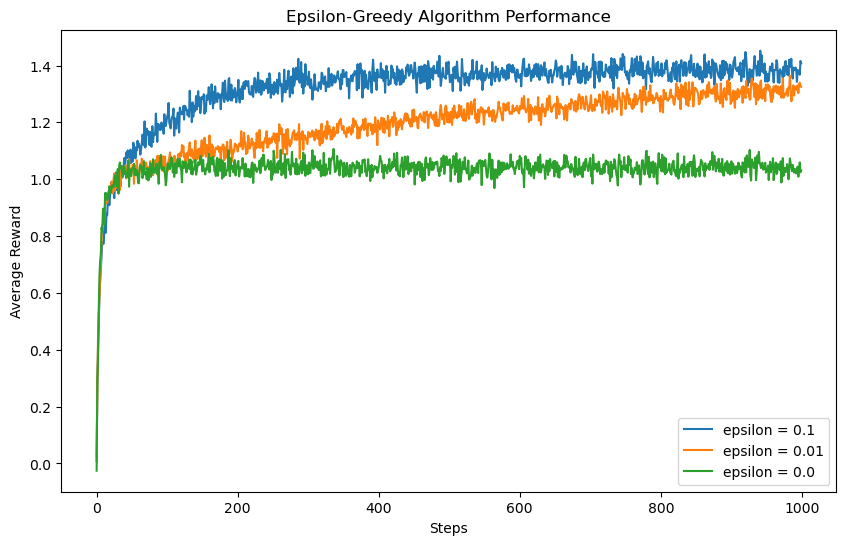

In [16]:
def run_experiment(epsilon, steps=1000, runs=2000):
    average_rewards = np.zeros(steps)
    for _ in range(runs):
        bandit = Bandit()
        rewards = epsilon_greedy(bandit, epsilon, steps)
        average_rewards += rewards
    average_rewards /= runs
    return average_rewards

epsilons = [0.1, 0.01, 0.0]
steps = 1000
results = {}

for epsilon in epsilons:
    results[epsilon] = run_experiment(epsilon, steps)
    
plt.figure(figsize=(10, 6))
for epsilon, rewards in results.items():
    plt.plot(rewards, label=f'epsilon = {epsilon}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Epsilon-Greedy Algorithm Performance')
plt.show()